<a href="https://colab.research.google.com/github/SeymaNurAksoy/CurrencyConverterApp/blob/main/deepLearning_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B130_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [212]:
import numpy as np
import pandas as pd
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding, LSTM
from tensorflow.keras.layers import Dense,Embedding,Activation,Dropout
from tensorflow.python.keras.layers.core import Activation
from keras.layers import Conv1D,MaxPooling1D,GlobalMaxPool1D
from tensorflow.keras.optimizers import Adam 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.models import load_model
import re
import nltk

nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
WPT = nltk.WordPunctTokenizer()
stop_word_list = nltk.corpus.stopwords.words('turkish')
stop_word_list


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'çok',
 'çünkü',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'eğer',
 'en',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'için',
 'ile',
 'ise',
 'kez',
 'ki',
 'kim',
 'mı',
 'mu',
 'mü',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niçin',
 'niye',
 'o',
 'sanki',
 'şey',
 'siz',
 'şu',
 'tüm',
 've',
 'veya',
 'ya',
 'yani']

In [213]:
!pip install --upgrade tensorflow
!pip install --upgrade keras


In [214]:
dataset = pd.read_excel('sentimentAnalysis.xlsx', sheet_name = 'Sheet1')
dataset

,Text,Sentiment
0,Daha öncede almıştım bu cihazdan ense ve sakal...,1
1,Ürün gayet başarılı sakal kesmede başlık sayıs...,1
2,Daha öncede aynısını almıştım çok güzel ve kal...,1
3,Erkek kuaförüyüm ense ve sıfır sakal traşı içi...,1
4,ürün gerçekten çok güzel,1
...,...,...
34187,J7 Pro Cihazı Geldi Fakat Faturası Gelmedi!,0
34188,Müşteri Hizmetlerine Ulaşamama Sorunu!,0
34189,Para İadesi Sorunu!,0
34190,Mağdur Ediyor!,0


In [215]:
dataset['Text'] = dataset['Text'].apply(lambda x: re.sub('[,\.!?:()"]', '', x))
dataset['Text'] = dataset['Text'].apply(lambda x: x.lower())
dataset['Text'] = dataset['Text'].apply(lambda x: x.strip())

def token(values):
    words = nltk.tokenize.word_tokenize(values)
    filtered_words = [word for word in words if word not in stop_word_list]
    not_stopword_doc = " ".join(filtered_words)
    return not_stopword_doc

dataset['Text'] = dataset['Text'].apply(lambda x: token(x))

In [216]:
dataset['Text']

0        öncede almıştım cihazdan ense sakal tüketmek o...
1        ürün gayet başarılı sakal kesmede başlık sayıs...
2         öncede aynısını almıştım güzel kaliteli bir ürün
3        erkek kuaförüyüm ense sıfır sakal traşı uygun ...
4                                     ürün gerçekten güzel
                               ...                        
34187           j7 pro cihazı geldi fakat faturası gelmedi
34188                müşteri hizmetlerine ulaşamama sorunu
34189                                  para i̇adesi sorunu
34190                                        mağdur ediyor
34191               ürünü aldığı halde parayı i̇ade etmedi
Name: Text, Length: 34192, dtype: object

In [217]:
data = dataset['Text'].values.tolist()
sentiment = dataset['Sentiment'].values.tolist()

In [218]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,sentiment,test_size = 0.2, random_state = 42)

In [219]:
x_train[290]

'ürün güzel tabanı ince bir saat bir yürüme mesafesinde ayaklarınızı ağrıtıyor'

In [220]:
y_train[290]

0

In [221]:
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(data)
tokenizer.word_index

{'bir': 1,
 'ürün': 2,
 'güzel': 3,
 'iyi': 4,
 'tavsiye': 5,
 'gayet': 6,
 'ederim': 7,
 'aldım': 8,
 'yok': 9,
 'geldi': 10,
 'hızlı': 11,
 'değil': 12,
 'göre': 13,
 'ürünü': 14,
 'olarak': 15,
 'var': 16,
 'kaliteli': 17,
 'kadar': 18,
 '0': 19,
 'telefon': 20,
 'uygun': 21,
 'teşekkürler': 22,
 'cok': 23,
 'biraz': 24,
 'ben': 25,
 'kargo': 26,
 'kullanışlı': 27,
 'fiyat': 28,
 'elime': 29,
 '1': 30,
 'küçük': 31,
 'fiyata': 32,
 'bi': 33,
 'gün': 34,
 'kalitesi': 35,
 'kesinlikle': 36,
 'fiyatına': 37,
 'şarj': 38,
 'sonra': 39,
 'gerçekten': 40,
 '3': 41,
 'bile': 42,
 'fakat': 43,
 'tam': 44,
 'memnun': 45,
 'tek': 46,
 'kötü': 47,
 'kullanıyorum': 48,
 'oldu': 49,
 'bence': 50,
 'iade': 51,
 'performans': 52,
 'fazla': 53,
 'ses': 54,
 'olması': 55,
 'ulaştı': 56,
 'ancak': 57,
 'uzun': 58,
 'harika': 59,
 'önce': 60,
 'sorun': 61,
 'sipariş': 62,
 'mükemmel': 63,
 'büyük': 64,
 'fiyatı': 65,
 'ürünün': 66,
 'başarılı': 67,
 'oldukça': 68,
 'aynı': 69,
 'urun': 70,
 'ayrıca': 

In [222]:

x_train_tokens = tokenizer.texts_to_sequences(x_train)
x_test_tokens = tokenizer.texts_to_sequences(x_test)

In [223]:
x_train_tokens[290]

[2, 3, 856, 217, 1, 92, 1, 4088]

In [224]:
x_train[290]

'ürün güzel tabanı ince bir saat bir yürüme mesafesinde ayaklarınızı ağrıtıyor'

In [225]:

num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]
num_tokens = np.array(num_tokens)

In [226]:
np.mean(num_tokens)

13.149303930744034

In [227]:
np.max(num_tokens)

229

In [228]:

max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

42

In [229]:

np.sum(num_tokens < max_tokens) / len(num_tokens)

0.9608095460926532

In [230]:

x_train_pad = np.array(pad_sequences(x_train_tokens, maxlen=max_tokens))
x_test_pad = np.array(pad_sequences(x_test_tokens, maxlen=max_tokens))


In [231]:
np.array(x_train_pad[3027])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [232]:
x_test_pad[2000]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, 36,  4], dtype=int32)

In [233]:

idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))


def tokens_to_string(tokens):
    words = [inverse_map[token] for token in tokens if token!=0]
    text = ' '.join(words)
    return text

In [234]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras import layers
model =Sequential()

embedding_size = 50


In [235]:

vocab =300 
max_kata = 100

model.add(Embedding(input_dim=10000,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))
model.add(Conv1D(64,8,activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(3,activation='softmax'))



In [236]:
import math
adam = keras.optimizers.Adam(learning_rate=math.exp(-5))
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [237]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 42, 50)           500000    
                                                                 
 conv1d_5 (Conv1D)           (None, 35, 64)            25664     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 17, 64)           0         
 1D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 17, 64)            0         
                                                                 
 dense_9 (Dense)             (None, 17, 32)            2080      
                                                                 
 dropout_7 (Dropout)         (None, 17, 32)            0         
                                                      

In [238]:

x_train_pad=np.array(x_train_pad)
y_train =np.array(y_train)

history = model.fit(x_train_pad, y_train, epochs=50, batch_size=64,validation_split=0.25)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


321/321 [==============================] - 15s 40ms/step - loss: 0.6277 - accuracy: 0.6556 - val_loss: 0.4678 - val_accuracy: 0.8117
Epoch 2/50
321/321 [==============================] - 9s 28ms/step - loss: 0.3227 - accuracy: 0.8703 - val_loss: 0.3043 - val_accuracy: 0.8721
Epoch 3/50
321/321 [==============================] - 7s 21ms/step - loss: 0.2271 - accuracy: 0.9087 - val_loss: 0.2851 - val_accuracy: 0.8773
Epoch 4/50
321/321 [==============================] - 7s 21ms/step - loss: 0.1816 - accuracy: 0.9274 - val_loss: 0.2919 - val_accuracy: 0.8756
Epoch 5/50
321/321 [==============================] - 7s 21ms/step - loss: 0.1501 - accuracy: 0.9382 - val_loss: 0.2985 - val_accuracy: 0.8734
Epoch 6/50
321/321 [==============================] - 7s 22ms/step - loss: 0.1219 - accuracy: 0.9487 - val_loss: 0.3335 - val_accuracy: 0.8703
Epoch 7/50
321/321 [==============================] - 7s 21ms/step - loss: 0.1093 - accuracy: 0.9515 - val_loss: 0.3671 - val_accuracy: 0.8734
Epoch 8/5

In [239]:
model.save("sentiment_model.h5")

In [240]:

x_test_pad=np.array(x_test_pad)
y_test =np.array(y_test)
result = model.evaluate(x_test_pad, y_test)

214/214 [==============================] - 1s 3ms/step - loss: 0.6435 - accuracy: 0.8668


In [241]:
result[1]

0.8667933940887451

In [242]:
y_pred = model.predict(x=x_test_pad[:700])


In [243]:
y_pred = y_pred.T[0]

In [244]:
y_pred

array([4.66253425e-07, 9.99914050e-01, 9.98024464e-01, 4.65750068e-01,
       1.13108583e-01, 5.69559120e-08, 9.99969244e-01, 9.99997854e-01,
       6.25590513e-09, 2.40354821e-01, 2.24998657e-05, 3.01858425e-01,
       9.99999642e-01, 9.03382540e-01, 9.99938011e-01, 4.65750068e-01,
       1.00000000e+00, 2.75468171e-01, 2.51907568e-05, 1.78871267e-06,
       3.95394023e-10, 8.82118762e-01, 1.18755497e-06, 9.99714553e-01,
       6.86454769e-07, 9.92386699e-01, 1.10514410e-11, 7.06622399e-11,
       4.65750068e-01, 1.03932815e-02, 3.32817197e-01, 6.16449229e-02,
       7.71781174e-07, 1.48512868e-06, 1.00000000e+00, 3.87597305e-04,
       2.38835998e-03, 9.99907732e-01, 6.34695543e-14, 5.74424922e-01,
       9.99992371e-01, 4.65750068e-01, 9.99999881e-01, 9.99998212e-01,
       1.41796113e-08, 6.69121509e-04, 1.00000000e+00, 9.99102473e-01,
       2.00177103e-01, 9.99999762e-01, 9.99997854e-01, 9.99995112e-01,
       7.27757625e-03, 1.00000000e+00, 5.05673420e-03, 6.31374375e-09,
      

In [245]:
text = "ürün gerçekten çok güzel"
texts = [text]
tokens = tokenizer.texts_to_sequences(texts)

In [246]:
tokens_pad = pad_sequences(tokens,maxlen = max_tokens)
tokens_pad.shape

(1, 42)

In [247]:
int(model.predict(tokens_pad).tolist()[0][0])

0

In [248]:
classes = np.argmax(int(model.predict(tokens_pad).tolist()[0][0]))
print("moralinizin {} olduğunu görüyorum. ".format(classes))


moralinizin 0 olduğunu görüyorum. 


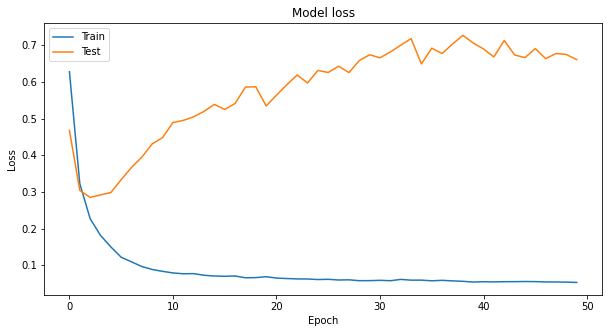

In [249]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

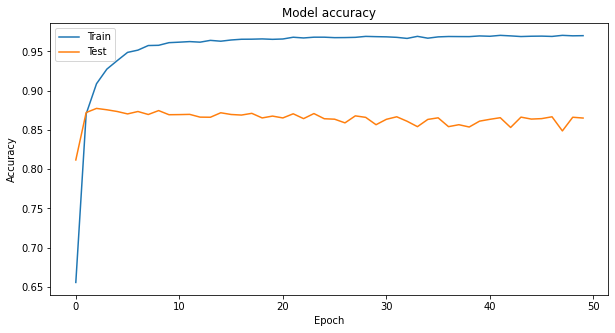

In [250]:
plt.figure(figsize = (10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [251]:
model.save("sentiment_model.h5")

In [252]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)